In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import residuals_plot

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


C:\Users\DanMona\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
data = pd.read_csv("Data/Clean_Wine_Data.csv").drop(columns=["Unnamed: 0", "points"])

In [4]:
print(data.columns)
data

Index(['country', 'description', 'designation', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery', 'Red?', 'wineType_encoded',
       'Wine_Bins'],
      dtype='object')


,country,description,designation,price,province,region_1,region_2,variety,winery,Red?,wineType_encoded,Wine_Bins
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,True,1,Iconic: Over $200
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,110.0,Northern Spain,Toro,Toro,Tinta de Toro,Bodega Carmen Rodríguez,True,1,Super Luxury: $100-200
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,False,0,Luxury: $50-100
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,True,1,Luxury: $50-100
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,73.0,Northern Spain,Toro,Toro,Tinta de Toro,Numanthia,True,1,Luxury: $50-100
...,...,...,...,...,...,...,...,...,...,...,...,...
134284,Italy,Many people feel Fiano represents southern Ita...,*Unknown Wine*,20.0,Southern Italy,Fiano di Avellino,Fiano di Avellino,White Blend,Feudi di San Gregorio,False,0,Premium: $15-20
134285,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,27.0,Champagne,Champagne,Champagne,Champagne Blend,H.Germain,False,0,Super Premium: $20-30
134286,Italy,This classic example comes from a cru vineyard...,Terre di Dora,20.0,Southern Italy,Fiano di Avellino,Fiano di Avellino,White Blend,Terredora,False,0,Premium: $15-20
134287,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,52.0,Champagne,Champagne,Champagne,Champagne Blend,Gosset,False,0,Luxury: $50-100


In [5]:
#Removed %10 of data to exclude outliers
quant = (data.price > np.quantile(data.price, 0.025)) & (data.price < np.quantile(data.price, 0.975))

quant_df = data.loc[quant]

In [6]:
labelencoder = LabelEncoder()
quant_df['country_label'] = labelencoder.fit_transform(quant_df['country'])
quant_df['variety_label'] = labelencoder.fit_transform(quant_df['variety'])
quant_df['winery_label'] = labelencoder.fit_transform(quant_df['winery'])
quant_df['designation_label'] = labelencoder.fit_transform(quant_df['designation'])
quant_df['province_label'] = labelencoder.fit_transform(quant_df['province'])
quant_df['region_1_label'] = labelencoder.fit_transform(quant_df['region_1'])
quant_df['wine_bin_label'] = labelencoder.fit_transform(quant_df['Wine_Bins'])
encoded_df = quant_df[['wineType_encoded', 'variety_label', 'designation_label', 'winery_label', 'country_label','province_label','region_1_label', 'price', 'wine_bin_label']]

C:\Users\DanMona\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DanMona\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DanMona\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [7]:
encoded_df.describe()

,wineType_encoded,variety_label,designation_label,winery_label,country_label,province_label,region_1_label,price,wine_bin_label
count,125961.000000,125961.000000,125961.000000,125961.000000,125961.000000,125961.000000,125961.000000,125961.000000,125961.000000
mean,0.695175,85.617604,9204.967331,6873.852534,25.902954,170.850859,724.382420,30.300649,2.879923
std,0.460335,46.468364,8709.984397,3788.431627,12.971053,129.753375,426.389803,18.766229,1.882131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,0.000000,34.000000,12.000000,3862.000000,14.000000,48.000000,306.000000,16.000000,1.000000
50%,1.000000,102.000000,7811.000000,7034.000000,34.000000,167.000000,755.000000,25.000000,4.000000
75%,1.000000,120.000000,17686.000000,10193.000000,37.000000,279.000000,1084.000000,40.000000,5.000000
max,1.000000,169.000000,26221.000000,13161.000000,40.000000,399.000000,1457.000000,104.000000,6.000000


<AxesSubplot:>

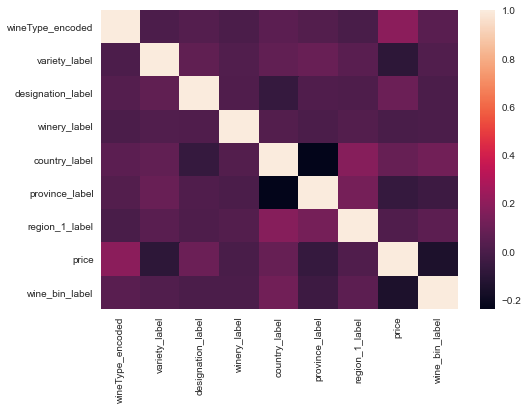

In [8]:
sn.heatmap(encoded_df.corr())

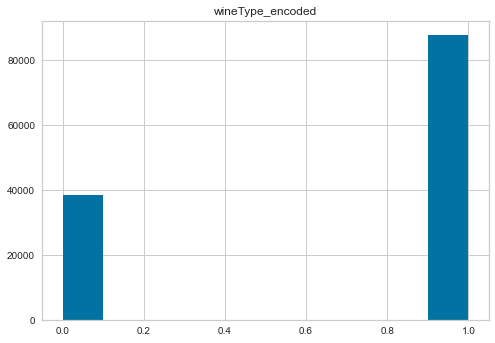

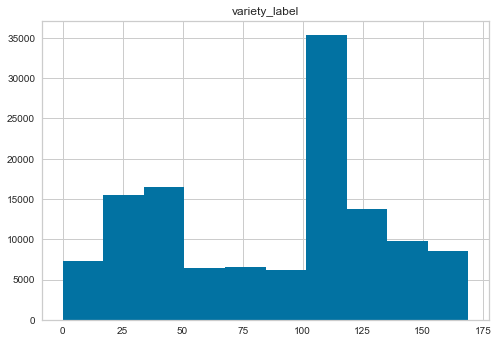

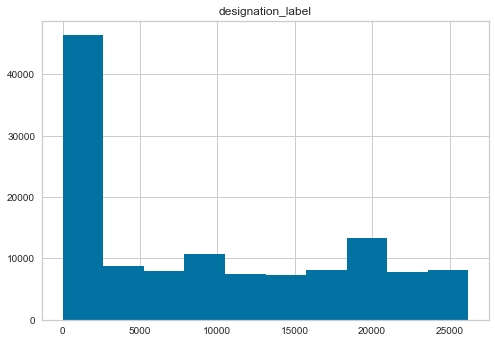

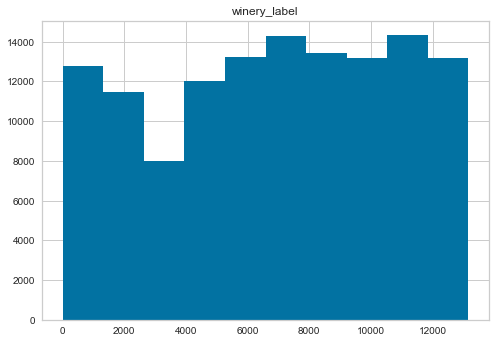

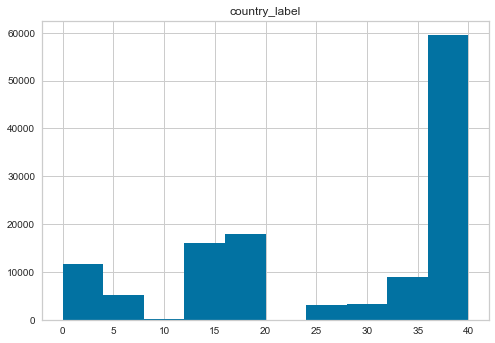

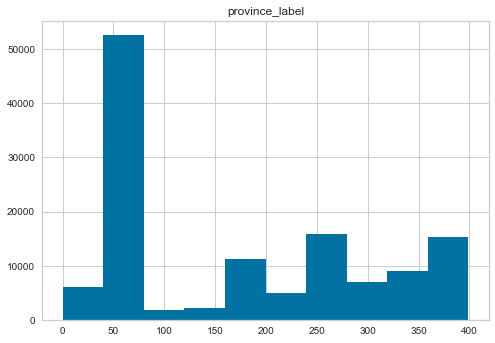

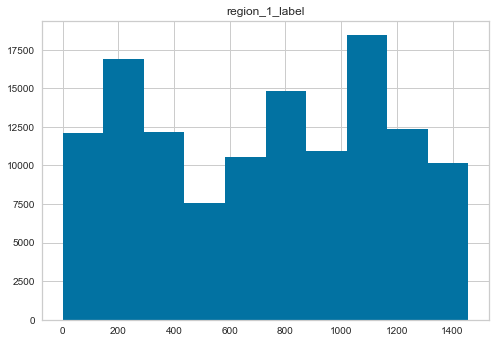

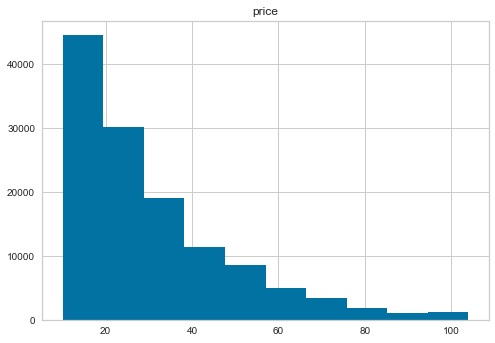

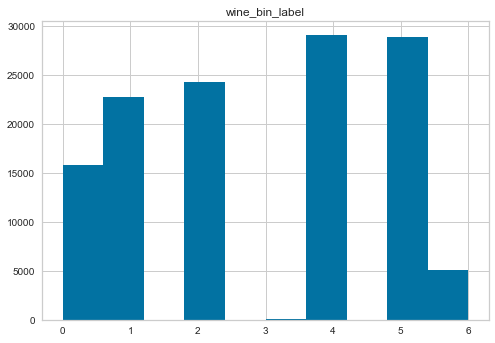

In [9]:
for col in encoded_df:
    encoded_df[col].hist()
    plt.title(col)
    plt.show()

In [10]:
X = encoded_df.drop('price',axis=1).values
y = encoded_df.price.values.reshape(-1,1).astype(int)
print(X.shape, y.shape)

(125961, 8) (125961, 1)


In [11]:
# #quant_df.iloc[:,4]
# quant_df.price
y

array([[90],
       [65],
       [73],
       ...,
       [20],
       [52],
       [15]])

In [12]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [13]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

# Linear Regression Model

In [14]:
LR = LinearRegression()
LR.fit(X, y)

LinearRegression()

In [15]:
predicted = LR.predict(X)

mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 318.8285482875645
R-squared (R2): 0.09467061725456904


In [16]:
LR.score(X, y)

0.09467061725456904

In [17]:
predictions_train = LR.predict(X_train)
predictions_test = LR.predict(X_test)

In [18]:
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"Trained Mean Squared Error (MSE) for LinearRegression: {mse_train}")
print(f"Trained R-squared (R2) for LinearRegression:{r2_train}")

Trained Mean Squared Error (MSE) for LinearRegression: 358.18515131209796
Trained R-squared (R2) for LinearRegression:-0.012871928579800906


In [19]:
mse_test = mean_squared_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

print(f"Test Mean Squared Error (MSE) for LinearRegression: {mse_test}")
print(f"Test R-squared (R2) for LinearRegression:{r2_test}")

Test Mean Squared Error (MSE) for LinearRegression: 352.65044322713834
Test R-squared (R2) for LinearRegression:-0.018327675566892854


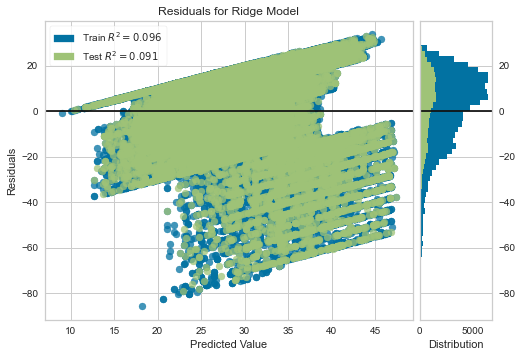

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

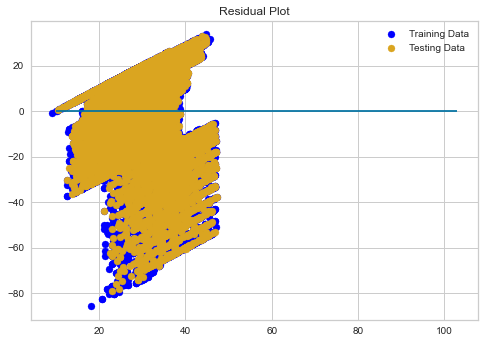

In [21]:
LR.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="goldenrod", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [22]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [23]:
rf.fit(X_train, y_train)

C:\Users\DanMona\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(n_estimators=10, random_state=0)

In [24]:
rf.score(X_test, y_test)

0.9531095504794639

In [25]:
predictions_train2 = rf.predict(X_train)
predictions_test2 = rf.predict(X_test)

In [26]:
errors = abs(predictions_test2 - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 19.36 dollars.


In [27]:
mse_train2 = mean_squared_error(y_train, predictions_train2)
r2_train2 = r2_score(y_train, predictions_train2)

print(f"Trained Mean Squared Error (MSE) for RFR: {mse_train2}")
print(f"Trained R-squared (R2) for RFR:{r2_train2}")

Trained Mean Squared Error (MSE) for RFR: 4.224872742191049
Trained R-squared (R2) for RFR:0.9880529525394574


In [28]:
mse_test2 = mean_squared_error(y_test, predictions_test2)
r2_test2 = r2_score(y_test, predictions_test2)

print(f"Test Mean Squared Error (MSE) for RFR: {mse_test2}")
print(f"Test R-squared (R2) for RFR:{r2_test2}")

Test Mean Squared Error (MSE) for RFR: 16.238327017216186
Test R-squared (R2) for RFR:0.9531095504794639


In [29]:
X_scaler_prod = StandardScaler().fit(X)
X_scaler_prod

StandardScaler()

In [30]:
filename = 'RFR_ML.sav'
pickle.dump(rf, open(filename, 'wb'))

In [31]:
filename = 'RFR_scaler.sav'
pickle.dump(X_scaler_prod, open(filename, 'wb'))